In [50]:
#import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="muted")
from numbers import Number
from scipy import stats
#allow plots and visualisations to be displayed in the report
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [232]:
# Read suicide data into pandas dataframe

suicides_df=pd.read_csv('master.csv')

# Data info
suicides_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [233]:
suicides_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [234]:
average_suicides = suicides_df.groupby('country')[['suicides/100k pop']].mean()
average_suicides

,suicides/100k pop
country,
Albania,3.502879
Antigua and Barbuda,0.552901
Argentina,10.469328
Armenia,3.275872
Aruba,9.503095
...,...
United Arab Emirates,1.317917
United Kingdom,7.502473
United States,13.819812


In [235]:
suicides_1990 = suicides_df.loc[suicides_df['year'] == 2010 | 2011 | 2012 | 2013 | 2014]
average_suicides_1190 = suicides_1990.groupby('country')[['suicides/100k pop']].mean()
average_suicides_1190

,suicides/100k pop
country,
Antigua and Barbuda,1.301667
Argentina,9.344167
Armenia,3.773333
Australia,12.848333
Austria,16.218333
...,...
Turkmenistan,2.373333
Ukraine,20.393333
United Kingdom,7.228333


In [236]:
# Read weather data into pandas dataframe

weather_df=pd.read_csv('average country temperature.csv')
weather_df.columns = ['country', ' max', 'min', 'aver']
# Data info
weather_df.head(20)

,country,max,min,aver
0,Albania,23.327707,8.807807,15.754521
1,Algeria,25.462626,13.570931,20.226494
2,American Samoa [United States],30.195890,25.536712,27.773151
3,Angola,29.437500,19.734756,24.206231
4,Antarctica,-5.973240,-13.236228,-17.251397
5,Argentina,24.293049,10.660793,16.848311
6,Armenia,15.151709,2.678417,7.775420
7,Australia,24.859423,12.721037,19.286642
8,Austria,12.059576,2.712869,6.972674
9,Azerbaijan,17.110811,7.574880,13.057522


In [262]:
df = pd.merge(suicides_df, weather_df, left_on= 'country', right_on='country')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23190 entries, 0 to 23189
Data columns (total 15 columns):
country               23190 non-null object
year                  23190 non-null int64
sex                   23190 non-null object
age                   23190 non-null object
suicides_no           23190 non-null int64
population            23190 non-null int64
suicides/100k pop     23190 non-null float64
country-year          23190 non-null object
HDI for year          7476 non-null float64
 gdp_for_year ($)     23190 non-null object
gdp_per_capita ($)    23190 non-null int64
generation            23190 non-null object
 max                  23190 non-null float64
min                   23190 non-null float64
aver                  23190 non-null float64
dtypes: float64(5), int64(4), object(6)
memory usage: 2.8+ MB


In [263]:
df.head(20)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,max,min,aver
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,23.327707,8.807807,15.754521
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,23.327707,8.807807,15.754521
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,23.327707,8.807807,15.754521
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,23.327707,8.807807,15.754521
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,23.327707,8.807807,15.754521
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,23.327707,8.807807,15.754521
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent,23.327707,8.807807,15.754521
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers,23.327707,8.807807,15.754521
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,23.327707,8.807807,15.754521
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X,23.327707,8.807807,15.754521


In [239]:
rate_suicides_df = df.groupby('country')[['suicides/100k pop']].mean()
rate_suicides_df

,suicides/100k pop
country,
Albania,3.502879
Argentina,10.469328
Armenia,3.275872
Australia,12.992806
Austria,23.759764
...,...
United Arab Emirates,1.317917
United Kingdom,7.502473
United States,13.819812


In [240]:
rate_suicides_df = pd.merge(rate_suicides_df, weather_df, left_on= 'country', right_on='country')
rate_suicides_df.head(10)

,country,suicides/100k pop,max,min,aver
0,Albania,3.502879,23.327707,8.807807,15.754521
1,Argentina,10.469328,24.293049,10.660793,16.848311
2,Armenia,3.275872,15.151709,2.678417,7.775420
3,Australia,12.992806,24.859423,12.721037,19.286642
4,Austria,23.759764,12.059576,2.712869,6.972674
5,Azerbaijan,1.855417,17.110811,7.574880,13.057522
6,Bahrain,1.854127,30.864789,24.623077,28.125205
7,Belarus,31.075913,10.695649,2.441005,5.722575
8,Belgium,21.237903,15.813592,8.055042,11.297808
9,Belize,6.230625,31.114483,23.842069,27.378356


In [241]:
corr = rate_suicides_df.corr(method='pearson')
corr

,suicides/100k pop,max,min,aver
suicides/100k pop,1.000000,-0.516377,-0.456059,-0.514383
max,-0.516377,1.000000,0.940414,0.968131
min,-0.456059,0.940414,1.000000,0.972766
aver,-0.514383,0.968131,0.972766,1.000000


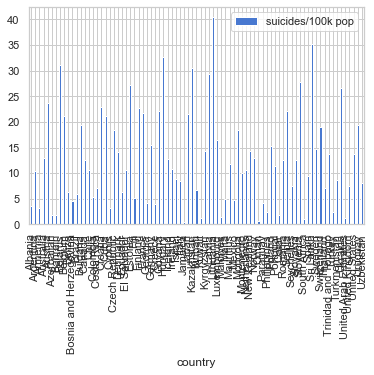

In [242]:
rate_suicides_df.plot(kind='bar',x='country',y='suicides/100k pop')

In [243]:
rate_suicides_df.sort_values(by=['aver'], inplace=True)
rate_suicides_df

,country,suicides/100k pop,max,min,aver
50,Mongolia,18.439000,8.625127,-6.551749,1.573512
26,Finland,22.770431,6.900310,0.361478,3.505922
13,Canada,12.467586,9.499157,-0.691907,4.224470
54,Norway,12.941000,8.448527,2.053510,4.657064
33,Iceland,12.800366,8.140909,3.251049,5.461869
...,...,...,...,...,...
6,Bahrain,1.854127,30.864789,24.623077,28.125205
40,Kiribati,6.655379,32.202222,25.691949,28.794247
46,Maldives,1.367333,31.189524,26.440329,29.039178
60,Qatar,1.787360,23.658333,15.496970,29.082192


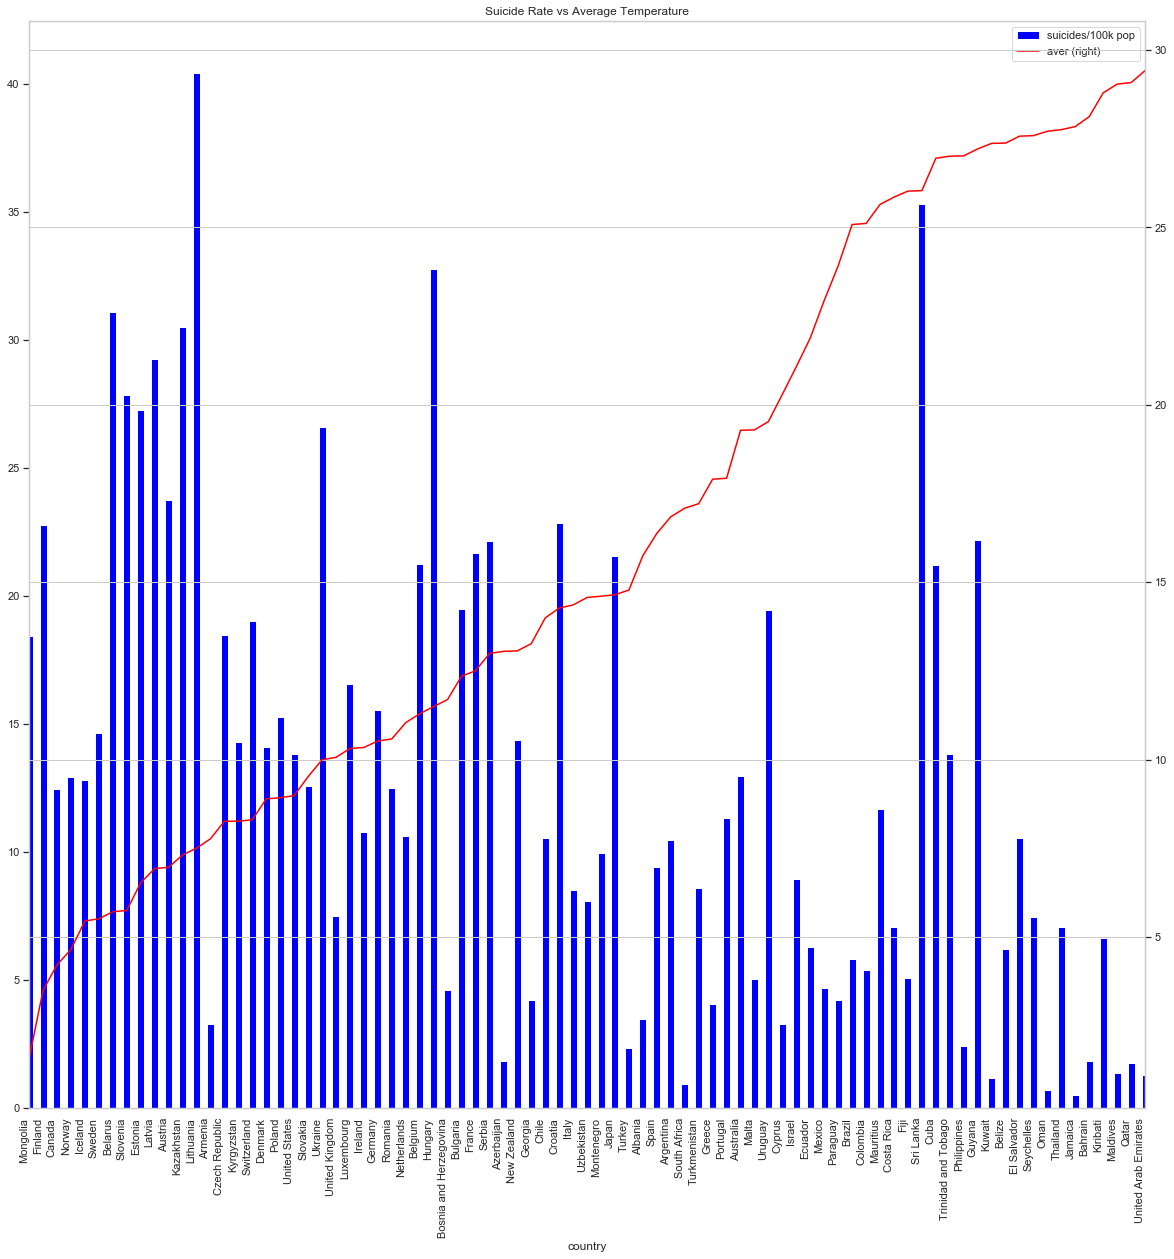

In [244]:
f, ax = plt.subplots(figsize=(20, 20))
ax.set_title('Suicide Rate vs Average Temperature')
ax.set_xlabel('Countries')
#ax.set_ylabel('ylabel')

rate_suicides_df.plot(kind='bar',x='country',y='suicides/100k pop', color ='blue', ax=ax)
rate_suicides_df.plot(kind='line',x='country',y='aver', color ='red', secondary_y=True, ax=ax )
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')

plt.show()

In [147]:
corr = rate_suicides_df.corr(method='pearson')
corr

,suicides/100k pop,max,min,aver
suicides/100k pop,1.000000,-0.516377,-0.456059,-0.514383
max,-0.516377,1.000000,0.940414,0.968131
min,-0.456059,0.940414,1.000000,0.972766
aver,-0.514383,0.968131,0.972766,1.000000


In [149]:
male_df = df.loc[df['sex'] == 'male']
male_rate_suicides_df = male_df.groupby('country')[['suicides/100k pop']].mean()
male_rate_suicides_df.columns = ['male suicides']
female_df = df.loc[df['sex'] == 'female']
female_rate_suicides_df = female_df.groupby('country')[['suicides/100k pop']].mean()
female_rate_suicides_df.columns = ['female suicides']
sex_rate_suicides_df = pd.merge(male_rate_suicides_df, female_rate_suicides_df, left_on= 'country', right_on='country')
sex_rate_suicides_df = pd.merge(sex_rate_suicides_df, weather_df, left_on= 'country', right_on='country')

sex_rate_suicides_df.head(10)

,country,male suicides,female suicides,max,min,aver
0,Albania,4.589242,2.416515,23.327707,8.807807,15.754521
1,Argentina,17.142688,3.795968,24.293049,10.660793,16.848311
2,Armenia,4.944966,1.606779,15.151709,2.678417,7.775420
3,Australia,20.671167,5.314444,24.859423,12.721037,19.286642
4,Austria,37.196754,10.322775,12.059576,2.712869,6.972674
5,Azerbaijan,2.686354,1.024479,17.110811,7.574880,13.057522
6,Bahrain,2.836508,0.871746,30.864789,24.623077,28.125205
7,Belarus,52.757619,9.394206,10.695649,2.441005,5.722575
8,Belgium,32.058602,10.417204,15.813592,8.055042,11.297808
9,Belize,11.003631,1.457619,31.114483,23.842069,27.378356


In [150]:
corr = sex_rate_suicides_df.corr(method='pearson')
corr = corr.iloc[0:2,4:]
corr

,aver
male suicides,-0.514580
female suicides,-0.476487


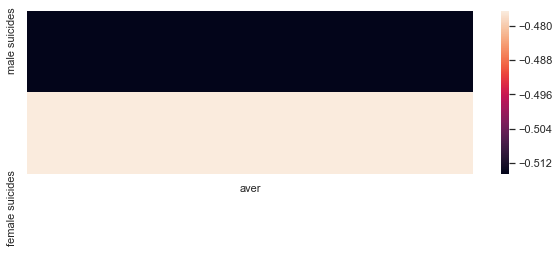

In [131]:
f, ax = plt.subplots(figsize=(10, 3))
sns.heatmap(corr, annot=False, annot_kws=annot_kws)

In [186]:
kids_df = df.loc[df['age'] == '5-14 years']
kids_rate_suicides_df = kids_df.groupby('country')[['suicides/100k pop']].mean()
kids_rate_suicides_df.columns = ['kids suicides']

kids_rate_suicides_df = pd.merge(kids_rate_suicides_df, weather_df, left_on= 'country', right_on='country')
kids_rate_suicides_df

,country,kids suicides,max,min,aver
0,Albania,0.433864,23.327707,8.807807,15.754521
1,Argentina,0.682581,24.293049,10.660793,16.848311
2,Armenia,0.196250,15.151709,2.678417,7.775420
3,Australia,0.394667,24.859423,12.721037,19.286642
4,Austria,0.504194,12.059576,2.712869,6.972674
...,...,...,...,...,...
75,United Arab Emirates,0.052500,36.418618,24.178632,29.420439
76,United Kingdom,0.106129,13.817393,6.774982,10.071989
77,United States,0.733387,17.643989,5.273111,8.993445
78,Uruguay,0.701071,24.957041,12.547725,19.531594


In [187]:
kids_rate_suicides_df.sort_values(by=['aver'], inplace=True)
kids_rate_suicides_df

,country,kids suicides,max,min,aver
26,Finland,0.518621,6.900310,0.361478,3.505922
13,Canada,0.862586,9.499157,-0.691907,4.224470
53,Norway,0.741167,8.448527,2.053510,4.657064
33,Iceland,0.447742,8.140909,3.251049,5.461869
68,Sweden,0.418966,8.571674,0.948786,5.522480
...,...,...,...,...,...
6,Bahrain,0.126429,30.864789,24.623077,28.125205
40,Kiribati,2.695000,32.202222,25.691949,28.794247
46,Maldives,0.303500,31.189524,26.440329,29.039178
59,Qatar,0.058214,23.658333,15.496970,29.082192


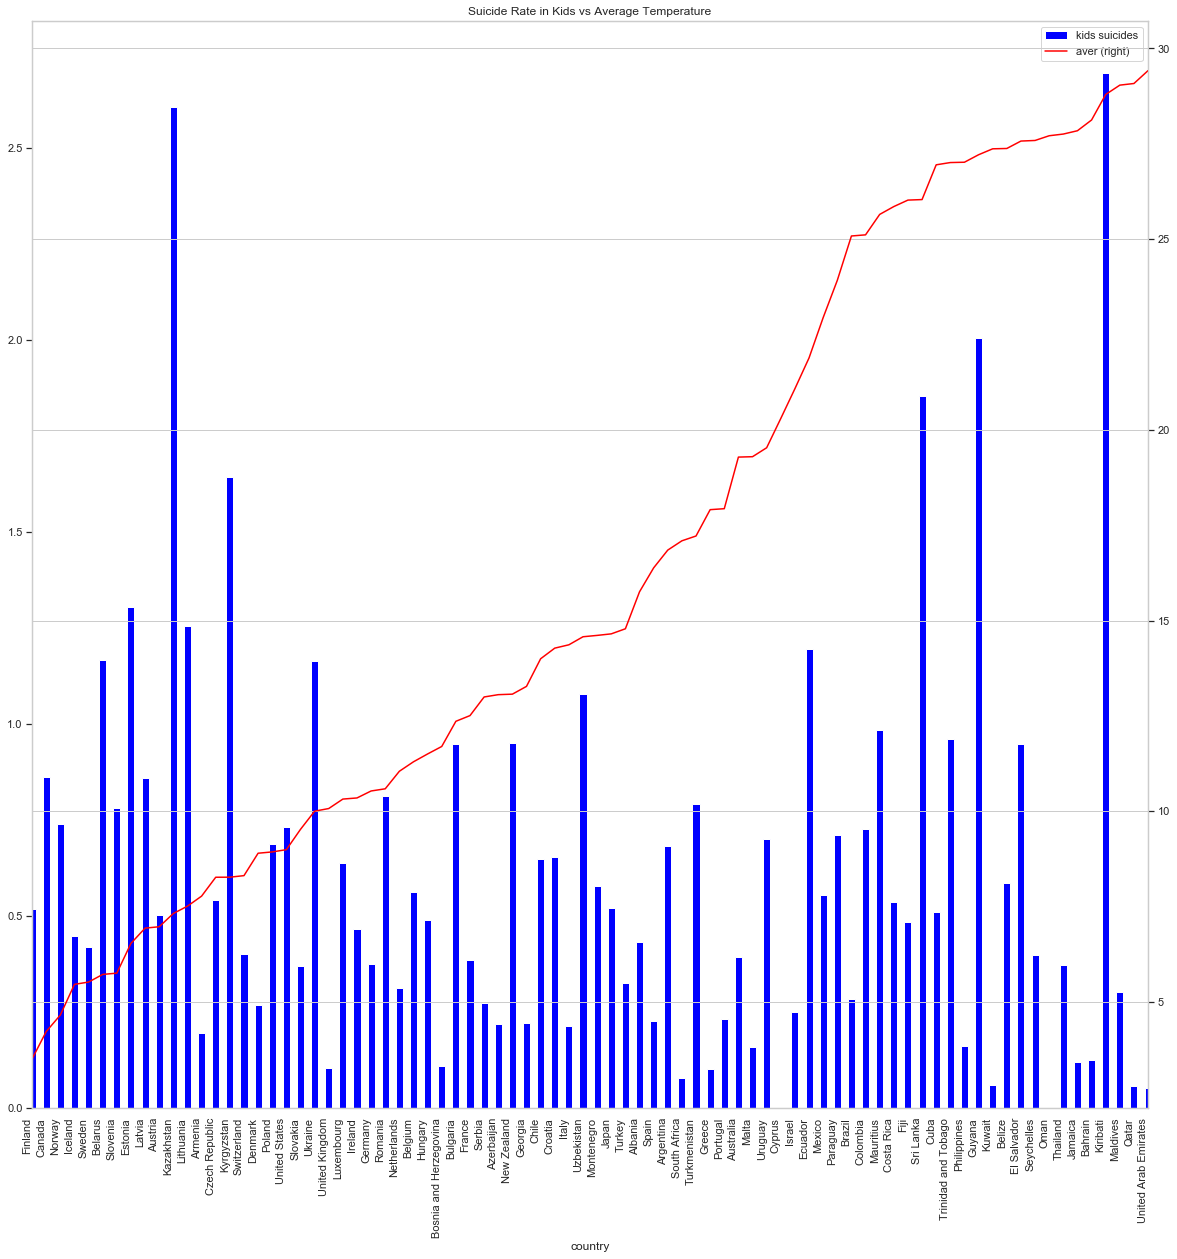

In [189]:
f, ax = plt.subplots(figsize=(20, 20))
ax.set_title('Suicide Rate in Kids vs Average Temperature')
ax.set_xlabel('Countries')
#ax.set_ylabel('ylabel')

kids_rate_suicides_df.plot(kind='bar',x='country',y='kids suicides', color ='blue', ax=ax)
kids_rate_suicides_df.plot(kind='line',x='country',y='aver', color ='red', secondary_y=True, ax=ax )
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')

plt.show()

In [191]:
corr = kids_rate_suicides_df.corr(method='pearson')
corr = corr
corr

,kids suicides,max,min,aver
kids suicides,1.000000,-0.076273,-0.067450,-0.085027
max,-0.076273,1.000000,0.940345,0.967301
min,-0.067450,0.940345,1.000000,0.972466
aver,-0.085027,0.967301,0.972466,1.000000


In [194]:
twenties_df = df.loc[df['age'] == '15-24 years']
twenties_rate_suicides_df = twenties_df.groupby('country')[['suicides/100k pop']].mean()
twenties_rate_suicides_df.columns = ['twenties suicides']

twenties_rate_suicides_df = pd.merge(twenties_rate_suicides_df, weather_df, left_on= 'country', right_on='country')
twenties_rate_suicides_df.sort_values(by=['aver'], inplace=True)
twenties_rate_suicides_df

,country,twenties suicides,max,min,aver
50,Mongolia,20.455000,8.625127,-6.551749,1.573512
26,Finland,19.912414,6.900310,0.361478,3.505922
13,Canada,12.887069,9.499157,-0.691907,4.224470
54,Norway,13.116500,8.448527,2.053510,4.657064
33,Iceland,13.907031,8.140909,3.251049,5.461869
...,...,...,...,...,...
6,Bahrain,1.701905,30.864789,24.623077,28.125205
40,Kiribati,15.512273,32.202222,25.691949,28.794247
46,Maldives,0.766000,31.189524,26.440329,29.039178
60,Qatar,2.265333,23.658333,15.496970,29.082192


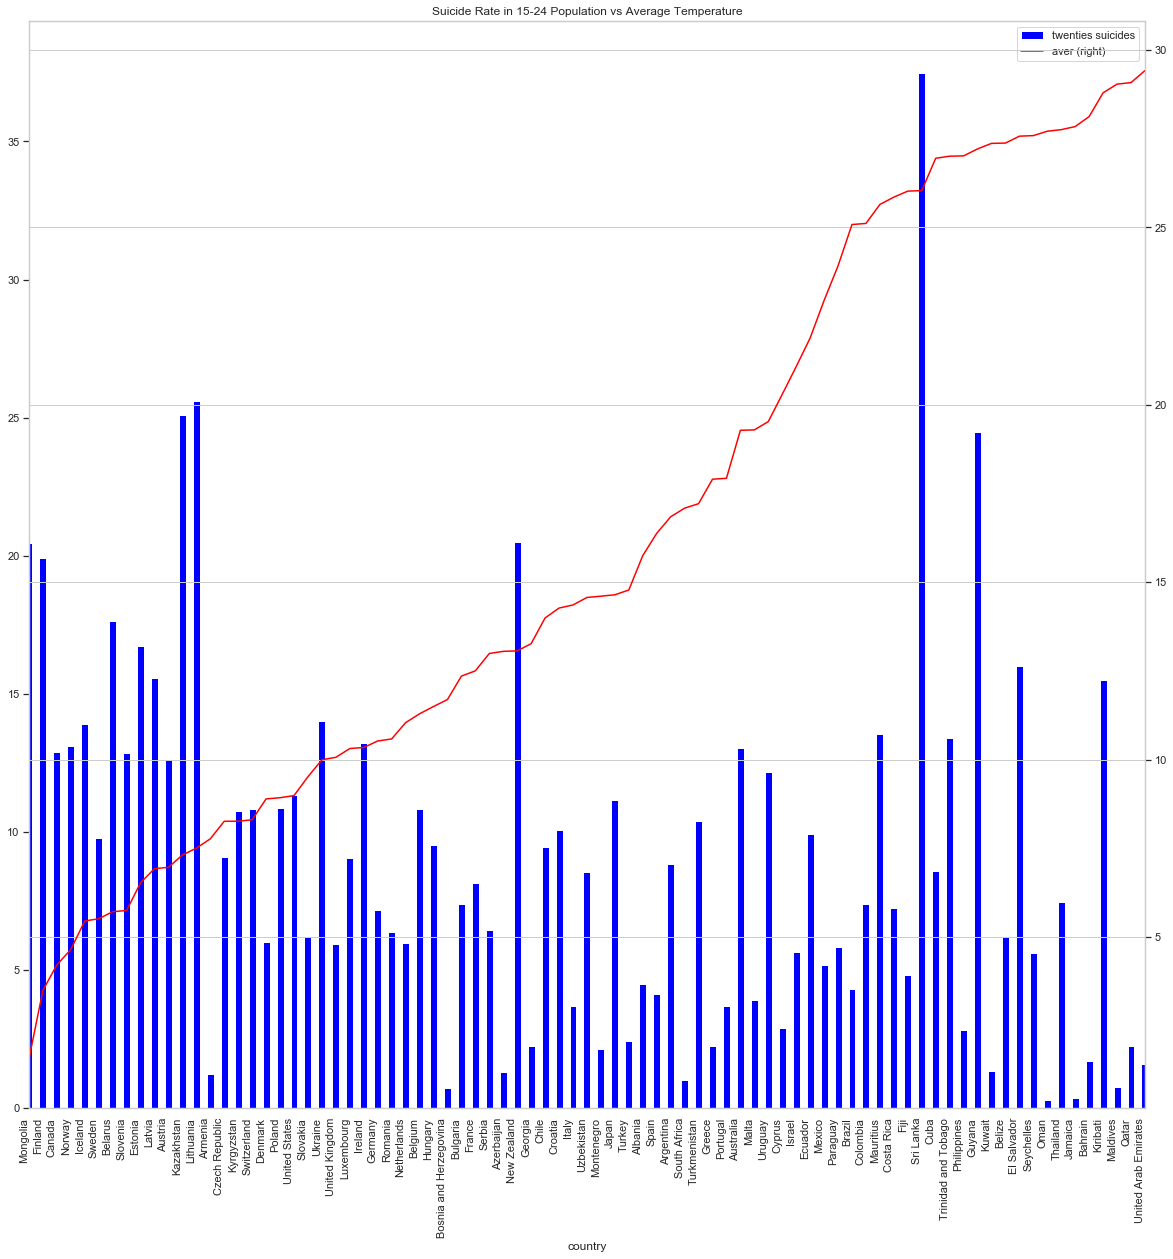

In [196]:
f, ax = plt.subplots(figsize=(20, 20))
ax.set_title('Suicide Rate in 15-24 Population vs Average Temperature')
ax.set_xlabel('Countries')
#ax.set_ylabel('ylabel')

twenties_rate_suicides_df.plot(kind='bar',x='country',y='twenties suicides', color ='blue', ax=ax)
twenties_rate_suicides_df.plot(kind='line',x='country',y='aver', color ='red', secondary_y=True, ax=ax )
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')

plt.show()

In [197]:
corr = twenties_rate_suicides_df.corr(method='pearson')
corr = corr
corr

,twenties suicides,max,min,aver
twenties suicides,1.000000,-0.298628,-0.235582,-0.285171
max,-0.298628,1.000000,0.940414,0.968131
min,-0.235582,0.940414,1.000000,0.972766
aver,-0.285171,0.968131,0.972766,1.000000


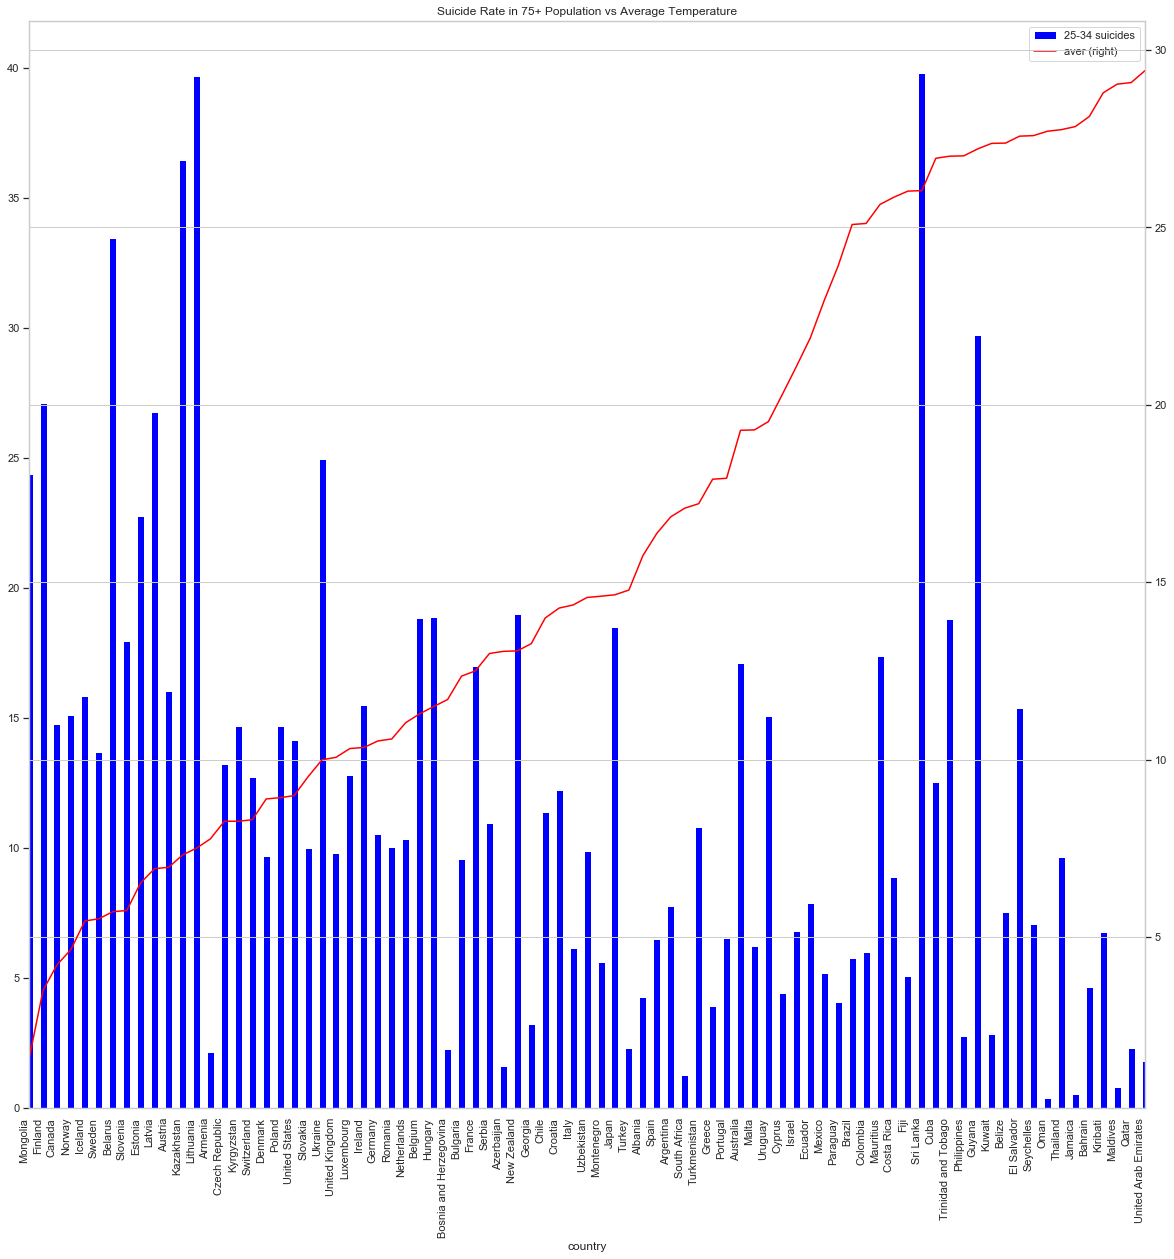

In [204]:
thirties_df = df.loc[df['age'] == '25-34 years']
thirties_rate_suicides_df = thirties_df.groupby('country')[['suicides/100k pop']].mean()
thirties_rate_suicides_df.columns = ['25-34 suicides']

thirties_rate_suicides_df = pd.merge(thirties_rate_suicides_df, weather_df, left_on= 'country', right_on='country')
thirties_rate_suicides_df.sort_values(by=['aver'], inplace=True)

f, ax = plt.subplots(figsize=(20, 20))
ax.set_title('Suicide Rate in 75+ Population vs Average Temperature')
ax.set_xlabel('Countries')
#ax.set_ylabel('ylabel')

thirties_rate_suicides_df.plot(kind='bar',x='country',y='25-34 suicides', color ='blue', ax=ax)
thirties_rate_suicides_df.plot(kind='line',x='country',y='aver', color ='red', secondary_y=True, ax=ax )
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')

plt.show()

In [205]:
corr = thirties_rate_suicides_df.corr(method='pearson')
corr = corr
corr

,25-34 suicides,max,min,aver
25-34 suicides,1.000000,-0.430991,-0.363345,-0.420045
max,-0.430991,1.000000,0.940414,0.968131
min,-0.363345,0.940414,1.000000,0.972766
aver,-0.420045,0.968131,0.972766,1.000000


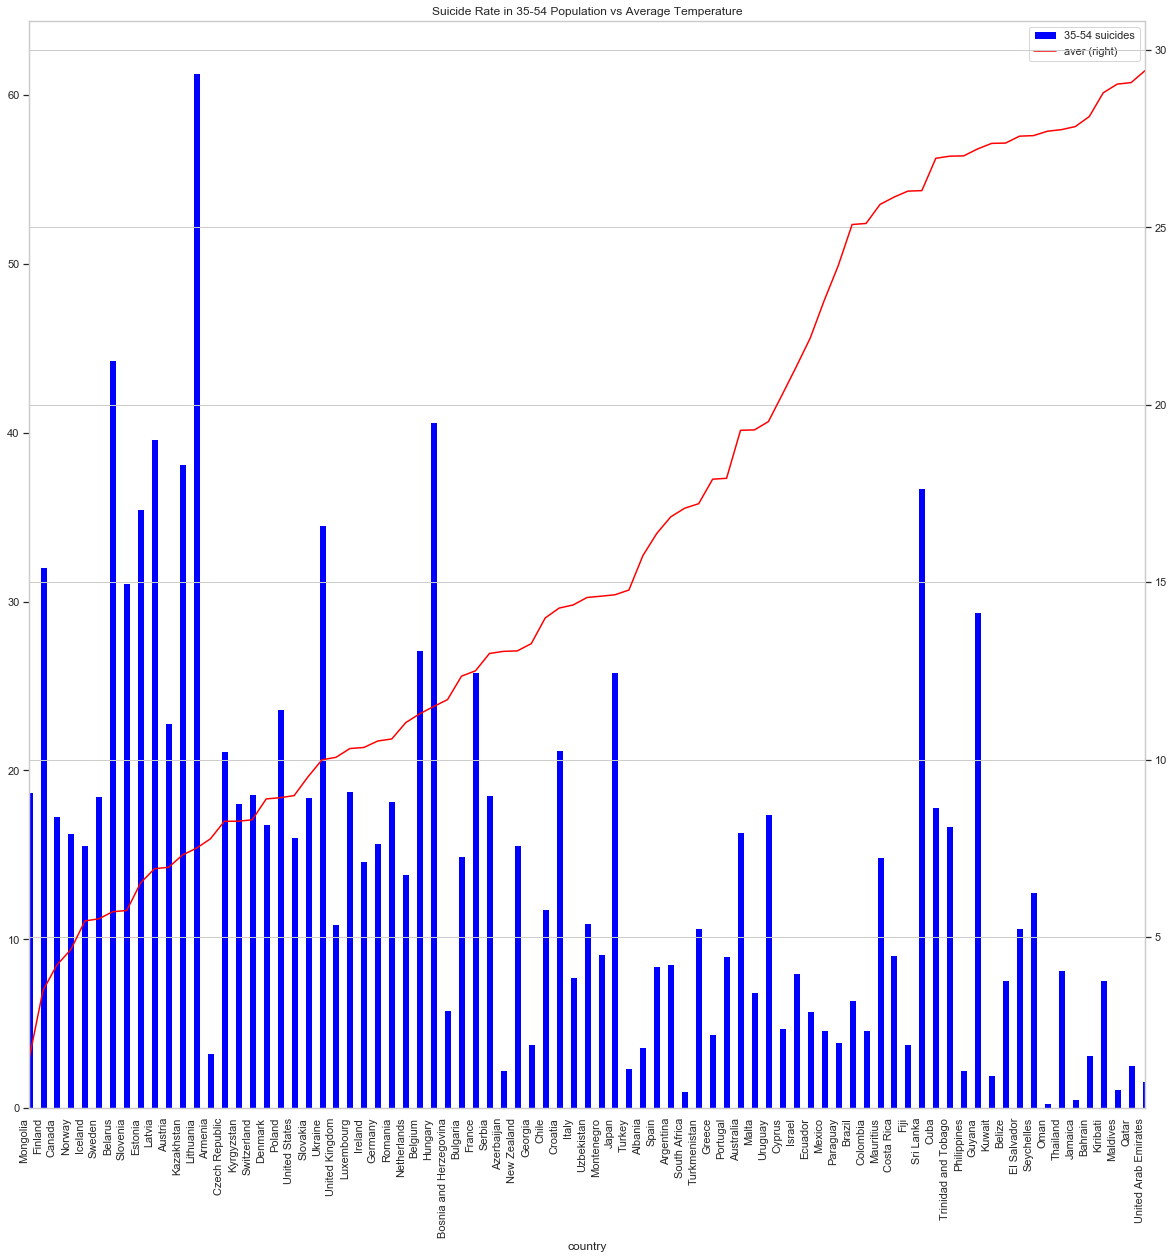

In [206]:
midlife_df = df.loc[df['age'] == '35-54 years']
midlife_rate_suicides_df = midlife_df.groupby('country')[['suicides/100k pop']].mean()
midlife_rate_suicides_df.columns = ['35-54 suicides']

midlife_rate_suicides_df = pd.merge(midlife_rate_suicides_df, weather_df, left_on= 'country', right_on='country')
midlife_rate_suicides_df.sort_values(by=['aver'], inplace=True)

f, ax = plt.subplots(figsize=(20, 20))
ax.set_title('Suicide Rate in 35-54 Population vs Average Temperature')
ax.set_xlabel('Countries')
#ax.set_ylabel('ylabel')

midlife_rate_suicides_df.plot(kind='bar',x='country',y='35-54 suicides', color ='blue', ax=ax)
midlife_rate_suicides_df.plot(kind='line',x='country',y='aver', color ='red', secondary_y=True, ax=ax )
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')

plt.show()

In [207]:
corr = midlife_rate_suicides_df.corr(method='pearson')
corr = corr
corr

,35-54 suicides,max,min,aver
35-54 suicides,1.000000,-0.542070,-0.469093,-0.531754
max,-0.542070,1.000000,0.940414,0.968131
min,-0.469093,0.940414,1.000000,0.972766
aver,-0.531754,0.968131,0.972766,1.000000


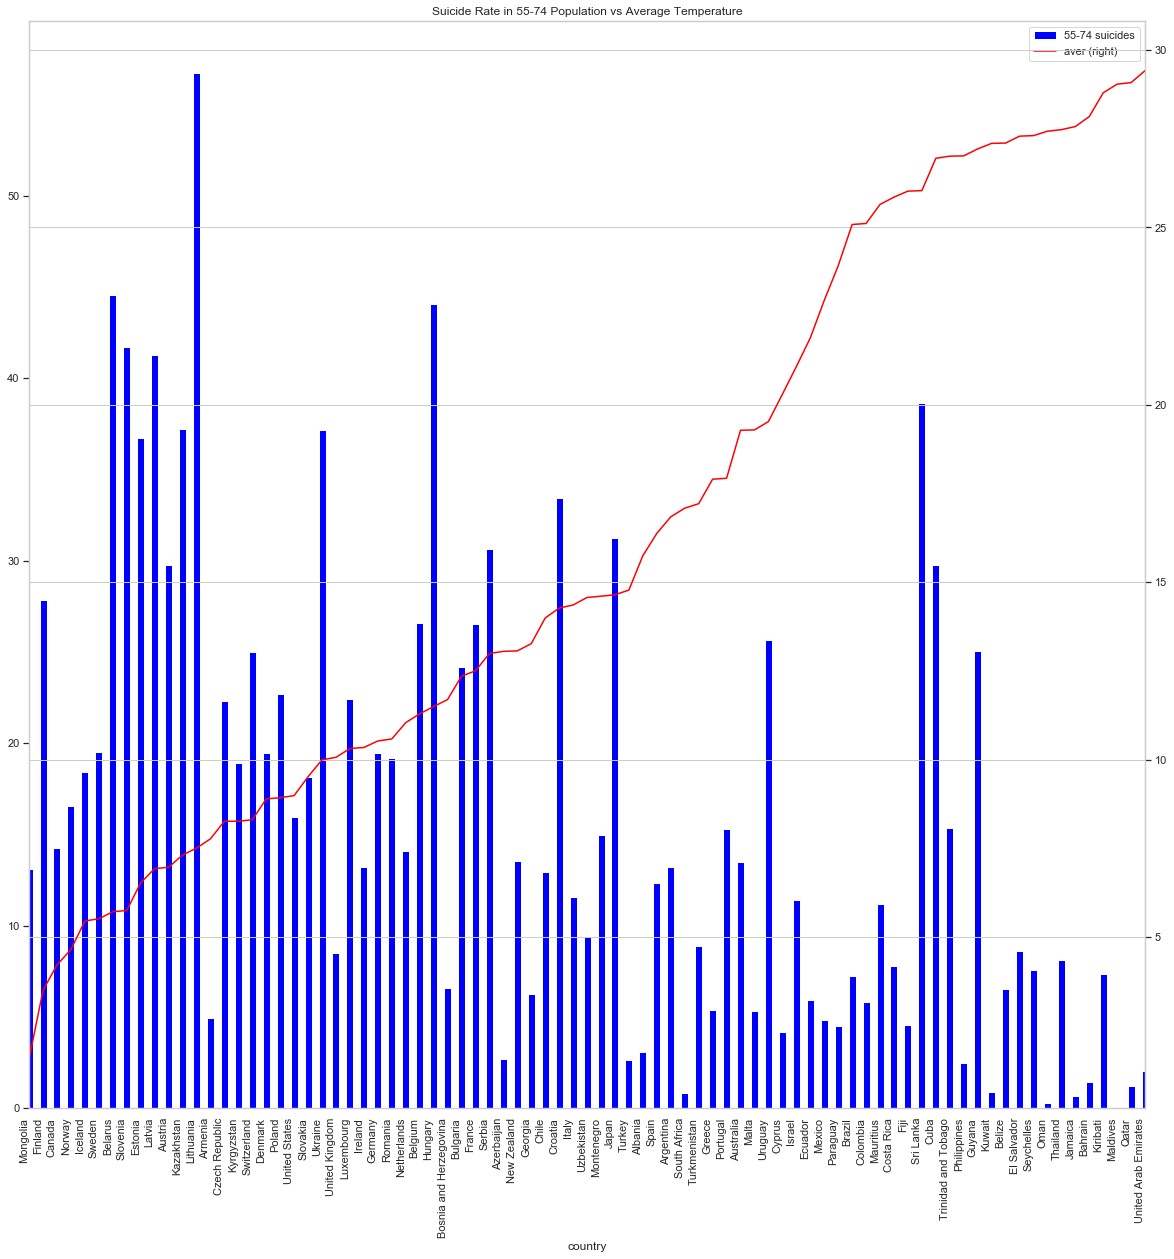

In [208]:
retired_df = df.loc[df['age'] == '55-74 years']
retired_rate_suicides_df = retired_df.groupby('country')[['suicides/100k pop']].mean()
retired_rate_suicides_df.columns = ['55-74 suicides']

retired_rate_suicides_df = pd.merge(retired_rate_suicides_df, weather_df, left_on= 'country', right_on='country')
retired_rate_suicides_df.sort_values(by=['aver'], inplace=True)

f, ax = plt.subplots(figsize=(20, 20))
ax.set_title('Suicide Rate in 55-74 Population vs Average Temperature')
ax.set_xlabel('Countries')
#ax.set_ylabel('ylabel')

retired_rate_suicides_df.plot(kind='bar',x='country',y='55-74 suicides', color ='blue', ax=ax)
retired_rate_suicides_df.plot(kind='line',x='country',y='aver', color ='red', secondary_y=True, ax=ax )
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')

plt.show()

In [209]:
corr = retired_rate_suicides_df.corr(method='pearson')
corr = corr
corr

,55-74 suicides,max,min,aver
55-74 suicides,1.000000,-0.540744,-0.480190,-0.540862
max,-0.540744,1.000000,0.940414,0.968131
min,-0.480190,0.940414,1.000000,0.972766
aver,-0.540862,0.968131,0.972766,1.000000


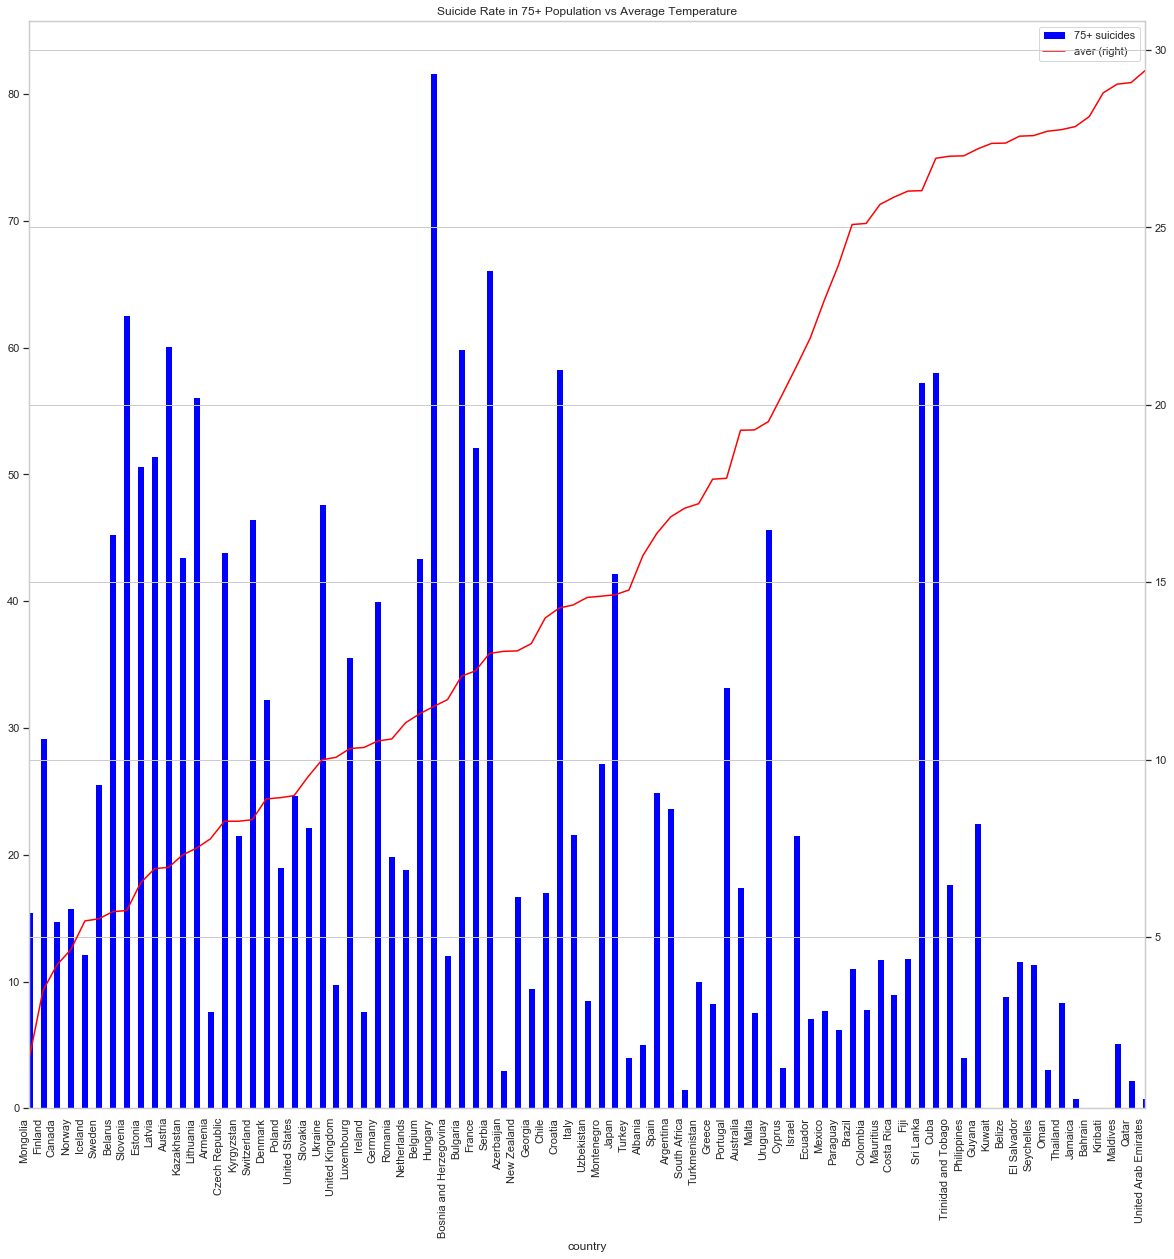

In [210]:
old_df = df.loc[df['age'] == '75+ years']
old_rate_suicides_df = old_df.groupby('country')[['suicides/100k pop']].mean()
old_rate_suicides_df.columns = ['75+ suicides']

old_rate_suicides_df = pd.merge(old_rate_suicides_df, weather_df, left_on= 'country', right_on='country')
old_rate_suicides_df.sort_values(by=['aver'], inplace=True)

f, ax = plt.subplots(figsize=(20, 20))
ax.set_title('Suicide Rate in 75+ Population vs Average Temperature')
ax.set_xlabel('Countries')
#ax.set_ylabel('ylabel')

old_rate_suicides_df.plot(kind='bar',x='country',y='75+ suicides', color ='blue', ax=ax)
old_rate_suicides_df.plot(kind='line',x='country',y='aver', color ='red', secondary_y=True, ax=ax )
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')

plt.show()

In [211]:
corr = old_rate_suicides_df.corr(method='pearson')
corr = corr
corr

,75+ suicides,max,min,aver
75+ suicides,1.000000,-0.450512,-0.410293,-0.458169
max,-0.450512,1.000000,0.940414,0.968131
min,-0.410293,0.940414,1.000000,0.972766
aver,-0.458169,0.968131,0.972766,1.000000


In [264]:
normal_df = df
normal_df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,max,min,aver
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,23.327707,8.807807,15.754521
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,23.327707,8.807807,15.754521
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,23.327707,8.807807,15.754521
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,23.327707,8.807807,15.754521
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,23.327707,8.807807,15.754521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23185,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X,21.357971,8.491659,14.576038
23186,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent,21.357971,8.491659,14.576038
23187,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,21.357971,8.491659,14.576038
23188,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,21.357971,8.491659,14.576038


In [265]:
normal_df["normal gdp per capita"]=((df["gdp_per_capita ($)"]-df["gdp_per_capita ($)"].min())/(df["gdp_per_capita ($)"].max()-df["gdp_per_capita ($)"].min()))*30

In [247]:
normal_df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,max,min,aver,normal gdp per capita
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,23.327707,8.807807,15.754521,0.129658
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,23.327707,8.807807,15.754521,0.129658
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,23.327707,8.807807,15.754521,0.129658
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,23.327707,8.807807,15.754521,0.129658
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,23.327707,8.807807,15.754521,0.129658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23185,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X,21.357971,8.491659,14.576038,0.489608
23186,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent,21.357971,8.491659,14.576038,0.489608
23187,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,21.357971,8.491659,14.576038,0.489608
23188,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,21.357971,8.491659,14.576038,0.489608


In [266]:
normal_df["temp*gdp"]=(df["aver"]-df["normal gdp per capita"])

In [267]:
normal_df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,max,min,aver,normal gdp per capita,temp*gdp
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,23.327707,8.807807,15.754521,0.129658,15.624863
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,23.327707,8.807807,15.754521,0.129658,15.624863
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,23.327707,8.807807,15.754521,0.129658,15.624863
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,23.327707,8.807807,15.754521,0.129658,15.624863
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,23.327707,8.807807,15.754521,0.129658,15.624863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23185,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X,21.357971,8.491659,14.576038,0.489608,14.086431
23186,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent,21.357971,8.491659,14.576038,0.489608,14.086431
23187,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,21.357971,8.491659,14.576038,0.489608,14.086431
23188,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,21.357971,8.491659,14.576038,0.489608,14.086431
